The goal of this activity is to practice reading-in data, extracting useful information from the data by creating useful summaries and visualizations about the specific variables contained in the data.

**Things to note:**
* Use the dataset provided "tips.csv"

---

# `tips`

Food servers' tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair treatment of the servers, for whom tips (at least in restaurants in the United States) are a major component of pay.

In one restaurant, a food server recorded the following data on all customers they served during an interval of two and a half months in early 1990. The restaurant, located in a suburban shopping mall, was part of a national chain and served a varied menu. In observance of local law the restaurant offered seating in a non-smoking section to patrons who requested it. Each record includes a day and time, and taken together, they show the server’s work schedule.

A complete description of the variables and their meanings is available in the data dictionary table below:

|obs  | Observation number |
|---  |---                 |
| total_bill | Total bill (cost of the meal), including tax, in US dollars |
| tip | Tip (gratuity) in US dollars |
| sex | Sex of person paying for the meal (0=male, 1=female) |
| smoker | Smoker in party? (0=No, 1=Yes) |
| day | Day of Week (4=Thur, 5=Fri, 6=Sat, 7=Sun) |
| time | Dinner, Lunch |
|size  | Size of the party |

### Exercise 1
<span  style="color:purple; font-size:16px">Determine the number of rows and columns in the data. What does each row in the data represent?</span>

In [1]:
# Answer
import pandas as pd
import matplotlib.pyplot as plt

tips= pd.read_csv('tips.csv')

tips.shape

(244, 7)

In [2]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    int64  
 3   smoker      244 non-null    int64  
 4   day         244 non-null    int64  
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 13.5+ KB


### Exercise 2
<span  style="color:purple; font-size:16px">Determine if there are any missing values in the data.</span>

In [3]:
# Answer

tips.isnull().sum()


total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

### Exercise 3
<span  style="color:purple; font-size:16px">The column names are not very descriptive. Use the `.rename()` method to rename the columns.</span>

Rename the columns as follows:
+ `tip` to `tip_amount`
+ `day` to `day_of_week`
+ `size` to `party_size`


In [27]:
# Answer
rename_dict = {'tip':'tip_amount', 'day':'day_of_week', 'size':'party_size'}

tips.rename(columns=rename_dict, inplace=True)
tips.head()


,total_bill,tip_amount,sex,smoker,day_of_week,time,party_size,tip_rate
0,16.99,1.01,Male,Male,Sun,Dinner,2,0.059447
1,10.34,1.66,Female,Male,Sun,Dinner,3,0.160542
2,21.01,3.50,Female,Male,Sun,Dinner,3,0.166587
3,23.68,3.31,Female,Male,Sun,Dinner,2,0.139780
4,24.59,3.61,Male,Male,Sun,Dinner,4,0.146808


### Exercise 4
<span  style="color:purple; font-size:16px">Extract the index using tips.index(). What type of index do you find? Is there a sensical column to use for the index? Why or why not?</span>

In [5]:
# Answer
tips.index

RangeIndex(start=0, stop=244, step=1)

In [6]:
tips.columns

Index(['total_bill', 'tip_amount', 'sex', 'smoker', 'day_of_week', 'time',
       'party_size'],
      dtype='object')

In [7]:
tips.head()

,total_bill,tip_amount,sex,smoker,day_of_week,time,party_size
0,16.99,1.01,0,0,7,Dinner,2
1,10.34,1.66,1,0,7,Dinner,3
2,21.01,3.50,1,0,7,Dinner,3
3,23.68,3.31,1,0,7,Dinner,2
4,24.59,3.61,0,0,7,Dinner,4


We can see there is a integer type of index for the dataframe. Index is used to uniquely identify each row. But if we check any existing column there not a single column which has unique values in all the rows. So we cannot use.

### Exercise 5
<span  style="color:purple; font-size:16px">Recode the `sex`, `smoker`, and `day_of_week` variables to the coding in the data dictionary description table at the top of the notebook. For example: recode `day_of_week` from the numeric representation (4, 5, 6, 7) to the ('Thur', 'Fri', 'Sat', 'Sun'). </span>

In [8]:
# Answer
replacement_1 = {0: 'Male', 1: 'Female'}
tips['sex'].replace(replacement_1, inplace=True)
tips['sex'].head()

0      Male
1    Female
2    Female
3    Female
4      Male
Name: sex, dtype: object

In [9]:
replacement_2 = {0: 'No', 1: 'Yes'}
tips['smoker'].replace(replacement_1, inplace=True)
tips['smoker'].head()

0    Male
1    Male
2    Male
3    Male
4    Male
Name: smoker, dtype: object

In [10]:
tips['day_of_week'].unique()

array([7, 6, 4, 5])

In [11]:
replacement_3 = {4: 'Thur', 5: 'Fri',6:'Sat', 7:'Sun'}
tips['day_of_week'].replace(replacement_3, inplace=True)
tips['day_of_week'].head()

0    Sun
1    Sun
2    Sun
3    Sun
4    Sun
Name: day_of_week, dtype: object

### Exercise 6
<span  style="color:purple; font-size:16px">How many people were in the largest party served by the waiter? The smallest?</span>

In [30]:
# Answer
tips['party_size'].max()

6

In [31]:
tips['party_size'].min()

1

### Exercise 7
<span  style="color:purple; font-size:16px">Create a histogram of the `total_bill` variable using 20 bins. Include a title and customize at least one other aspect of the plot. </span>

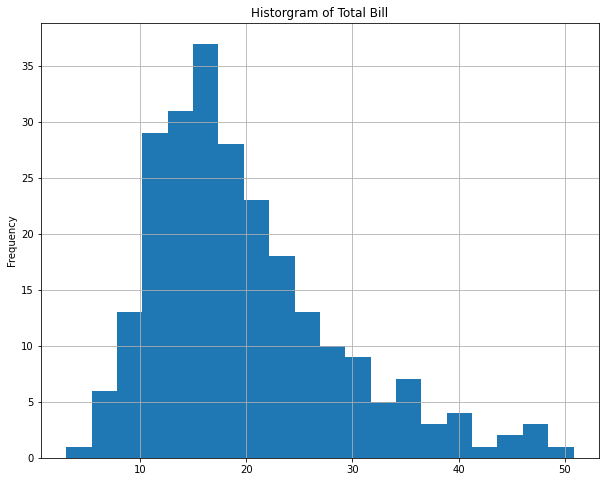

In [51]:
# Answer
tips['total_bill'].plot(kind='hist',
                       bins=20,
                       title='Historgram of Total Bill',
                       grid = True,
                       figsize=(10,8))

plt.show()

### Exercise 8
<span  style="color:purple; font-size:16px">What is a 'typical' bill size? What measure would be appropriate for describing 'typical'?</span>

In [14]:
# Answer
tips.total_bill.value_counts().idxmax()

13.42

value_counts() will be the appropriate measure to describe typical bill size.

### Exercise 9
<span  style="color:purple; font-size:16px">Create a new variable, `tip_rate` which is the `tip_amount` divided by `total_bill`. Create a histogram of the new variable. Describe the shape and any unusual values you see. What appears to be the most typical tip size? Is this suprising or to be expected?</span>

In [15]:
# Answer
tips['tip_rate']= tips['tip_amount']/tips['total_bill']
tips

,total_bill,tip_amount,sex,smoker,day_of_week,time,party_size,tip_rate
0,16.99,1.01,Male,Male,Sun,Dinner,2,0.059447
1,10.34,1.66,Female,Male,Sun,Dinner,3,0.160542
2,21.01,3.50,Female,Male,Sun,Dinner,3,0.166587
3,23.68,3.31,Female,Male,Sun,Dinner,2,0.139780
4,24.59,3.61,Male,Male,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Female,Male,Sat,Dinner,3,0.203927
240,27.18,2.00,Male,Female,Sat,Dinner,2,0.073584
241,22.67,2.00,Female,Female,Sat,Dinner,2,0.088222
242,17.82,1.75,Female,Male,Sat,Dinner,2,0.098204


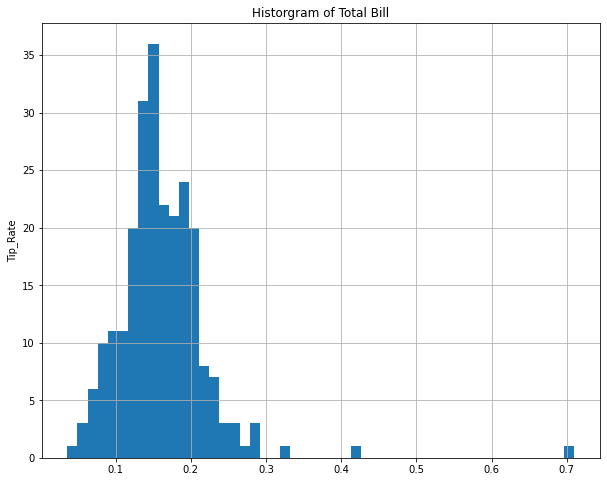

In [16]:
tips['tip_rate'].plot(kind='hist',
                       bins=50,
                       title='Historgram of Total Bill',
                       grid = True,
                       figsize=(10,8))
plt.ylabel('Tip_Rate')
plt.show()

This graph shows that histogram is right skewed. Mostly the typical tip rate is between 0.1 and 0.2. On the right side there are few records some outliers are there, which are between 0.3 and 0.7. 

### Exercise 10
<span  style="color:purple; font-size:16px">Extract the entire row of data for the 10 largest and 10 smallest values of `tip_rate`. This can be done different ways but these steps are one way. First, extract the 10 largest values and save this as a DataFrame called 'largest'. Create a new variable called 'largest_indexes' which is the index of 'largest'. Use the `.loc()` method to extract all the data corresponding to those indexes.</span>

In [17]:
# Answer
largest=tips.nlargest(10, 'tip_rate')
largest

,total_bill,tip_amount,sex,smoker,day_of_week,time,party_size,tip_rate
172,7.25,5.15,Female,Female,Sun,Dinner,2,0.710345
178,9.60,4.00,Male,Female,Sun,Dinner,2,0.416667
67,3.07,1.00,Male,Female,Sat,Dinner,1,0.325733
232,11.61,3.39,Female,Male,Sat,Dinner,2,0.291990
183,23.17,6.50,Female,Female,Sun,Dinner,4,0.280535
109,14.31,4.00,Male,Female,Sat,Dinner,2,0.279525
149,7.51,2.00,Female,Male,Thur,Lunch,2,0.266312
93,16.32,4.30,Male,Female,Fri,Dinner,2,0.263480
221,13.42,3.48,Male,Female,Fri,Lunch,2,0.259314
51,10.29,2.60,Male,Male,Sun,Dinner,2,0.252672


In [18]:
smallest= tips.nsmallest(10,'tip_rate')
smallest

,total_bill,tip_amount,sex,smoker,day_of_week,time,party_size,tip_rate
237,32.83,1.17,Female,Female,Sat,Dinner,2,0.035638
102,44.30,2.50,Male,Female,Sat,Dinner,3,0.056433
57,26.41,1.50,Male,Male,Sat,Dinner,2,0.056797
0,16.99,1.01,Male,Male,Sun,Dinner,2,0.059447
187,30.46,2.00,Female,Female,Sun,Dinner,5,0.065660
210,30.06,2.00,Female,Female,Sat,Dinner,3,0.066534
48,28.55,2.05,Female,Male,Sun,Dinner,3,0.071804
146,18.64,1.36,Male,Male,Thur,Lunch,3,0.072961
240,27.18,2.00,Male,Female,Sat,Dinner,2,0.073584
184,40.55,3.00,Female,Female,Sun,Dinner,2,0.073983


### Exercise 11
<span  style="color:purple; font-size:16px">Use the `.describe()` method to print out summary statistics for all numeric variables.</span>

In [19]:
# Answer
tips.describe()

,total_bill,tip_amount,party_size,tip_rate
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,0.160803
std,8.902412,1.383638,0.951100,0.061072
min,3.070000,1.000000,1.000000,0.035638
25%,13.347500,2.000000,2.000000,0.129127
50%,17.795000,2.900000,2.000000,0.154770
75%,24.127500,3.562500,3.000000,0.191475
max,50.810000,10.000000,6.000000,0.710345


### Exercise 12
<span  style="color:purple; font-size:16px">Create a bar graph showing the number of parties served on each day of the week. What day had the heaviest volume (in terms of number of tables served)? What day had the lowest volume?</span>

In [20]:
# Answer
days=['Thur','Fri','Sat','Sun']
day_num= dict()
for day in days:
    val=tips.day_of_week[tips['day_of_week'] == day].count()
    day_num[day]=val
day_num    

{'Thur': 62, 'Fri': 19, 'Sat': 87, 'Sun': 76}

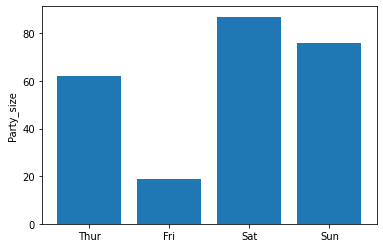

In [21]:
plt.bar(day_num.keys(), day_num.values())
plt.ylabel('Party_size')
plt.show()

### Exercise 13
<span  style="color:purple; font-size:16px">Create a Series showing the proportion of parties served for each day of the week. </span>

In [22]:
# Answer
parties_per_day=pd.Series(day_num)
parties_per_day

Thur    62
Fri     19
Sat     87
Sun     76
dtype: int64

### Exercise 14
<span  style="color:purple; font-size:16px">Find the total number of orders where the `total_bill` is greater than 40 dollars AND the party size was 4 or less.</span>

In [23]:
# Answer
tips.loc[(tips['total_bill'] >40) &(tips['party_size']<=4)].count()

total_bill     8
tip_amount     8
sex            8
smoker         8
day_of_week    8
time           8
party_size     8
tip_rate       8
dtype: int64

### Exercise 15
<span  style="color:purple; font-size:16px">Who pays the bill more often: men or women? Create a pie chart and create a Series showing the proportion of bills paid by each `sex`.</span>

In [24]:
# Answer

m_bill=tips.day_of_week[tips['sex'] == 'Male'].count()
f_bill=tips.day_of_week[tips['sex'] == 'Female'].count()

In [25]:

bill_paid=pd.DataFrame({'Bills_Paid':[f_bill,m_bill]},index=['Female','Male'])
bill_paid

,Bills_Paid
Female,157
Male,87


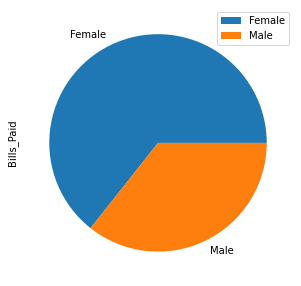

In [26]:
bill_paid.plot.pie(y='Bills_Paid', figsize=(5, 5))
plt.show()